In [60]:
import sympy
import numpy

from matplotlib import pyplot
%matplotlib inline          # 그래프 그린걸 line에 바로 표시해라
sympy.init_printing()       # 수식을 LaTex 스타일로 표시

UsageError: unrecognized arguments: # 그래프 그린걸 line에 바로 표시해라


In [61]:
w =sympy.symbols('w', real=True)

f = w**2 + 3*w - 5;
f

In [62]:
fprime = f.diff(w);     # 미분하기
fprime

In [63]:
sympy.solve(fprime, w) # =0인 w 구하기


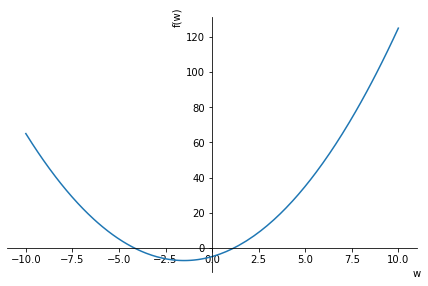

In [64]:
sympy.plotting.plot(f);

In [65]:
fpnum = sympy.lambdify(w,fprime) 

type(fpnum)



function

Gradient Desent

In [66]:
w = 10.0
for i in range(1000):
    w = w-fpnum(w)*0.01
    
print(w)

-1.4999999806458753


실제 linear한 관계를 가진 데이터 생성하기

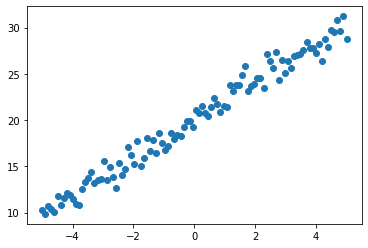

In [67]:
x_data = numpy.linspace(-5, 5, 100) # x를 -5부터 4까지 100개로 쪼개서 array 만듬
w_true = 2                          # y = wx + b 식에서 w랑 b를 임의로 정해줌
b_true = 20
# numpy안에 normal distribution 만드는 함수를 통해서 조금 노이즈 넣어서 y 생성
y_data = w_true * x_data + b_true + numpy.random.normal(size=len(x_data))  

pyplot.scatter(x_data, y_data);                                                                       

실제로 linear한 속성 있는 데이터 만들어서 Gradient descent 알고리즘을 이용해 에러를 가장 적게 하는 $w$랑 b를 구함. 그리고 그 w랑 b로 그린 직선이 linear reg 직선이 됨

In [68]:
w, b, x, y = sympy.symbols('w b x y')

cost_function = (w*x + b - y)**2
cost_function    


In [76]:
x_data.shape

In [78]:
y_data.shape

In [79]:
# 식에 바로 넣어주기 위해서 
# f = sympy.lambdify(정의역 문자, sympy 함수, 'numpy') f를 Numpy에 적용가능한 함수로 만들기
# 기울기를 구해주는 함수 구하기
grad_b = sympy.lambdify([w, b, x, y], cost_function.diff(b), 'numpy') # numpy 적용가능한 함수를 cost_function을 b에 편미분 해서 미지수 wbxy 이렇게 4개를 정의역으로 받겠다
grad_w = sympy.lambdify([w, b, x, y], cost_function.diff(w), 'numpy')

In [86]:
cost_function.diff(b)

In [91]:
grad_b(w,b,x_data,y_data) #grad_b에 x와 y 데이터를 넣어서 구한 기울기 전부임 # 열 하나임

array([-20.53020318, -19.70224083, -21.40529803, -20.87040126,
       -20.11761404, -23.6056805 , -21.60930693, -23.23353289,
       -24.24128778, -23.7000613 , -22.88067418, -21.84484251,
       -21.57965228, -25.07667409, -26.5402235 , -27.53606302,
       -28.76544698, -26.48841928, -26.95151965, -27.27599548,
       -31.10114719, -26.98683403, -29.84924818, -27.7124652 ,
       -25.36584684, -30.6745577 , -28.10839558, -29.39816501,
       -34.22001039, -32.47455164, -30.43727511, -35.42831871,
       -30.14387527, -31.7589863 , -36.05384815, -33.38735063,
       -35.68001925, -32.87026781, -37.23312922, -35.13337345,
       -33.60493665, -34.34584377, -37.23155864, -35.95299356,
       -36.70053479, -36.59927157, -38.49635785, -39.840276  ,
       -39.8996767 , -38.46861238, -42.23530805, -41.57123721,
       -43.00348296, -41.43474656, -40.89981729, -42.87602755,
       -44.68642748, -43.38456417, -41.83335263, -42.96814058,
       -42.85017868, -47.47121389, -46.22448424, -47.62

In [119]:
 numpy.sum(grad_b(w,b,x_data,y_data));

In [94]:
# Gradient Descent는 이렇게 임의의 값을 넣어서 시작한다
w = 0
b = 0

# numpy.sum 행렬의 열 합계. w, b, x 등등 각 열을 각각 해준게 아님

# 하나하나 하면 너무 노이즈가 많잇
for i in range(1000):
    descent_b = numpy.sum(grad_b(w,b,x_data,y_data))/len(x_data) # b에 대해 미분한 식에 대해 기울기 평균으로 맨 처음 
    descent_w = numpy.sum(grad_w(w,b,x_data,y_data))/len(x_data)
    w = w - descent_w*0.01 # with 0.01 the step size
    b = b - descent_b*0.01 
    
    
    #내가 가진 모든 데이터의 평균으로 한 번
    
# 이런 방법도 있고 데이터가 많으면 2의 상수배 만큼의 데이터를 뽑아서 (32, 64 ..) 평균낸걸 넣어준다
# Bach 방법론 

print(w)
print(b)
    

2.0479480966975547
20.0717345833525


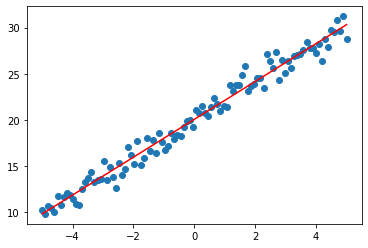

In [95]:
pyplot.scatter(x_data,y_data)
pyplot.plot(x_data, w*x_data+b, '-r');

In [88]:
# numpy.sum  행렬의 열 합계 예시

import numpy as np
a = np.arange(12).reshape(4,3)
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [89]:
s = np.sum(a, axis=0)
print(s)

[18 22 26]


실제 데이터를 가지고 regression 라인 찾기

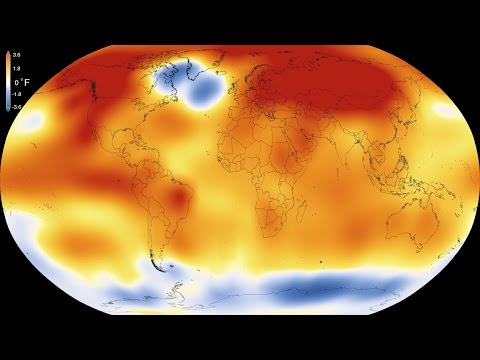

In [96]:
# 코드에서 유투브 비디오 보여주기...
from IPython.display import YouTubeVideo
YouTubeVideo('gGOzHVUQCw0')

#### 데이터 가져오기
National Oceanic and Atmospheric Administration 홈페이지에서 데이터 가져오기

In [98]:
# 웹사이트에 있는 데이터를 컴퓨터에 csv로 저장하기

from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')

('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x7f9a2eb7d850>)

In [111]:
# numpy로 csv 파일 읽기
#import numpy
#fname = 'C:/Users/KAIST/goorm/ML/land_global_temperature_anomaly-1880-2016.csv'

year, temp_anomaly = numpy.loadtxt(fname='land_global_temperature_anomaly-1880-2016.csv', delimiter=',', skiprows=5, unpack=True)

# np.loadtxt(fname,                      # 파일명

#                     dtype,                       # 데이터형식(디폴트: float)

#                    delimiter,                 # 분리구분기호 

#                     skiprows,                 # skip할 행

#                     usecols)                    # 불러올 컬럼


In [114]:
from matplotlib import pyplot
%matplotlib inline


In [ ]:
# x, y data 어떠케 생겼는지 보기
pyplot.plot(year, temp_anomaly)
pyplot.rc('font', family='serif', size='18')

#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1) 
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();

f(x) =w*x + b 식의 cost function J(x)를 구한 후 이걸 w, b에 대해 각각 미분해서 J를 최소로 만드는 w b를 구할 수 있다 (x, y data가 이미 존재하기 때문 )
결국 이 방법은 Gradient descent 를 이용한게 아니라 우리가 평소에 아는 미분을 사용해서 reg 직선을 만들어 준 것 

In [120]:

w = numpy.sum(temp_anomaly*(year - year.mean())) / numpy.sum(year*(year - year.mean())) 
b = a_0 = temp_anomaly.mean() - w*year.mean()

print(w)
print(b)

0.01037028394347266
-20.148685384658464


In [121]:
reg = b + w * year

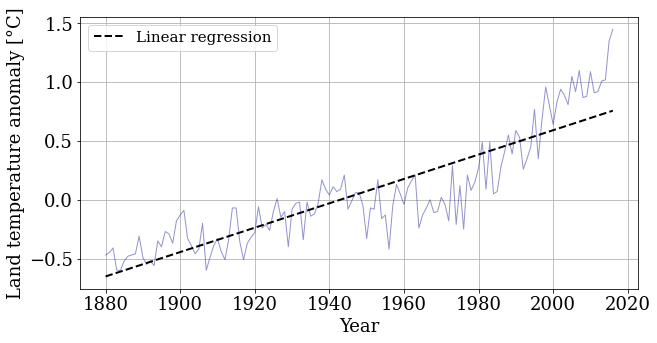

In [122]:
pyplot.figure(figsize=(10, 5))

pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) # x와 y 데이터 구하기
pyplot.plot(year, reg, 'k--', linewidth=2, label='Linear regression') # 점선 그리고 라벨 달기 
pyplot.xlabel('Year') 
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();